# 2
# PPFQ

## Construccion de indicadores

-57-

Existen categorias de indicadores:

- Indicadores sobre series de precio
    - indicadores tardíos (trend-following)
    - indicadores de saturacion (contrarians)
    - indicadores de referencia: Osciladores acotados (sobre precio o sobre indicadores)

<br />

- indicadores de flujo (volumen o derivados)

- indicadores combinados

- conteos discretos

- estacionalidad

- indicadores estáticos

- Referenciales (Benchmarks)

- Ratios y series de Análisis fundamental

- Sentiment

- Exógenos al mercado

In [1]:
from dotenv import load_dotenv
import os
from apps.forex_api import fx_price, fx_it
import pandas as pd
import pandas_ta as ta
import numpy as np
import seaborn as sns
from scipy import stats


load_dotenv()
TOKEN = os.environ["TOKEN_AV"]
# data = fx_price("FX_DAILY", "EUR", "USD", TOKEN)

In [2]:
# data.to_csv('data-daily-raw.csv')

data = pd.read_csv("data-daily-raw.csv", index_col=0)

In [3]:
# AJUSTE DE DATA
new_labels = ['Open', "High", "Low", "Close"]

data.rename(dict(zip(data.columns, new_labels)), axis=1, inplace=True)

data = data.iloc[-1::-1]


## Indicadores tardíos

-58-

In [4]:
from apps.medias_moviles import moving_averages

moving_averages(data, "Close", window=50)

,SMA_50,EMA_50,WMA_50,DEMA_50,TRIMA_L_50,TEMA_50
2003-08-29,NaN,1.097900,NaN,1.097900,NaN,1.097900
2003-09-01,NaN,1.097084,NaN,1.096684,NaN,1.096488
2003-09-02,NaN,1.091437,NaN,1.087488,NaN,1.085041
2003-09-03,NaN,1.088776,NaN,1.083917,NaN,1.081452
2003-09-04,NaN,1.089689,NaN,1.086598,NaN,1.086051
...,...,...,...,...,...,...
2022-10-24,0.989811,0.991197,0.984235,0.972776,1.009285,0.974561
2022-10-25,0.989409,0.991409,0.984502,0.973914,1.008461,0.976519
2022-10-26,0.989216,0.992058,0.985229,0.975873,1.007654,0.979635
2022-10-27,0.988972,0.992230,0.985512,0.976844,1.006864,0.981226


-61-

LISTA DE INDICADORES POR CATEGORIA:

- Momentum (trend-following):
    - MACD
    - ADX
    - DX
    - ADXR
    - MINUS_DI, PLUS_DI, MINUS_DM, PLUS_DM (componentes del ADX)
    - SAR (parabolic SAR- Trailing Stop)
    - MOM 
    - MIDPOINT
    - MIDPRICE

<br />    

- Contrarian:
    - CCI (Commodity channel index, indica inicio y fin de tendencia)
    - AROON (Anticipador de inicio de tendencia)
    - AROONOSC (diferencia entre las curvas de AROON)
    - BBAND (bollinger band)
    - TRANGE: Proxy de "volatilidad" True Range, es un estimador del rango normal de trading o movimiento
    - ATR: Average True Range, es la media móvil del True Range, la media movil del rango de movimiento, en términos absolutos

<br />

- Osciladores trend-following:
    - WILLR (similar estocástico)
    - APO (Absolute Price oscilator)
    - PPO (Percantage Price oscilator)
    - STOCH, STOCHF: El conocido oscilador estocástico sobre el OHLC
    - RSI
    - BOP (balance of power)
    - CMO (Chande momentum oscilator) - variante rsi
    - ROC (mide variacion % respecto a n ruedas atras)
    - MFI (Money flow index) - se interpreta como el RSI pero tiene en cuenta el volumen
    - TRIX - oscilador de TEMA para n ruedas atras
    - ULTOSC (Ultimate Oscilator) - oscilador de 3 períodos, es como promediar 3 RSIs con 3 n diferentes

In [5]:
# MACD
def macd(data, label, fast, slow, suavizado):
    dataux = pd.DataFrame()
    ema_fast = data[label].ewm(span=fast).mean()
    ema_slow = data[label].ewm(span=slow).mean()
    dataux['macd'] = ema_fast - ema_slow
    dataux['signal'] = dataux.macd.ewm(span=suavizado).mean()
    dataux['histograma'] = dataux.macd - dataux.signal
    return dataux.dropna()#.round(3)

macd(data, "Close", fast=12, slow=26, suavizado=9)

,macd,signal,histograma
2003-08-29,0.000000,0.000000,0.000000
2003-09-01,-0.000036,-0.000020,-0.000016
2003-09-02,-0.000526,-0.000228,-0.000299
2003-09-03,-0.000715,-0.000393,-0.000322
2003-09-04,-0.000341,-0.000377,0.000036
...,...,...,...
2022-10-24,-0.002059,-0.004091,0.002032
2022-10-25,-0.000658,-0.003404,0.002746
2022-10-26,0.001353,-0.002453,0.003806
2022-10-27,0.001994,-0.001563,0.003557


### pandas_ta

In [6]:
# VERIFICACION DEL VALOR DE MACD
# help(ta.macd)
data.ta.macd()

,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
2003-08-29,NaN,NaN,NaN
2003-09-01,NaN,NaN,NaN
2003-09-02,NaN,NaN,NaN
2003-09-03,NaN,NaN,NaN
2003-09-04,NaN,NaN,NaN
...,...,...,...
2022-10-24,-0.002059,0.002032,-0.004091
2022-10-25,-0.000658,0.002746,-0.003404
2022-10-26,0.001353,0.003806,-0.002453
2022-10-27,0.001994,0.003557,-0.001563


### rsi

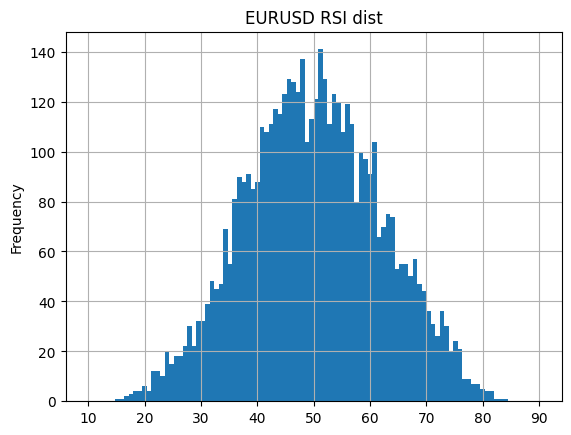

In [7]:
## VISUALIZACION RSI - INDICADOR ACOTADO
# help(ta.rsi)
data.ta.rsi()
data.ta.rsi().plot(kind='hist', grid=True, title="EURUSD RSI dist", bins=100, range=(10, 90));

In [8]:
print (f"La kurtosis es {data.ta.rsi().kurt():.2f}")
print (f"El skew es {data.ta.rsi().skew():.2f}")
print (f"La media es {data.ta.rsi().mean():.2f}")
print (f"El desvio estandar es {data.ta.rsi().std():.2f}")
print (f"La proba que sea una dist_normal es: {stats.normaltest(data.ta.rsi().dropna()).pvalue:.2%}")

La kurtosis es -0.38
El skew es 0.03
La media es 50.02
El desvio estandar es 12.10
La proba que sea una dist_normal es: 0.00%


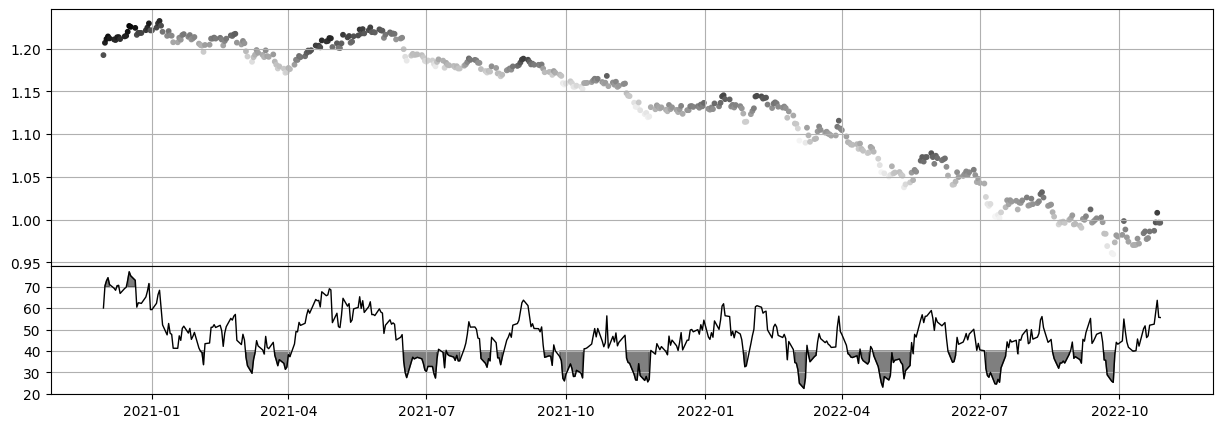

In [9]:
import matplotlib.pyplot as plt
data['rsi'] = data.ta.rsi()

fig, ax = plt.subplots(figsize=(15,5), nrows=2, gridspec_kw={'height_ratios':[2,1]})

df = data.dropna().iloc[-500:, -2:]
df.index = pd.to_datetime(df.index)
ax[0].scatter(df.index, df.Close, s=10, cmap="binary", c=df.rsi/100) 
ax[0].grid() 

ax[1].plot(df.index, df.rsi, lw=1, c='k')
ax[1].set_yticks(range(10,90,10))

ax[1].fill_between(df.index, df.rsi, 70, where=df.rsi>70, alpha=0.5, color='k')
ax[1].fill_between(df.index, df.rsi, 40, where=df.rsi<40, alpha=0.5, color='k')
ax[1].grid()

plt.subplots_adjust(hspace=0)


In [10]:
data.drop(columns='rsi', inplace=True)

### Aroon

In [11]:
# AROON
n=12
data['smin'] = data.Low.shift().rolling(n).apply(lambda x: x.argmin())
data['smax'] = data.High.shift().rolling(n).apply(lambda x: x.argmax())
data['aroon_up'] = 100*data['smax'] /n
data['aroon_down'] = 100*data['smin'] /n
data['aroon_dif'] = data['aroon_up'] - data['aroon_down']


tail = data.tail(n)
tail.style.highlight_max('High').highlight_min("Low")


,Open,High,Low,Close,smin,smax,aroon_up,aroon_down,aroon_dif
2022-10-13,0.970480,0.980600,0.962900,0.977710,1.000000,5.000000,41.666667,8.333333,33.333333
2022-10-14,0.977550,0.980860,0.970600,0.971900,0.000000,4.000000,33.333333,0.000000,33.333333
2022-10-17,0.972230,0.985220,0.971800,0.984000,10.000000,3.000000,25.000000,83.333333,-58.333333
2022-10-18,0.983930,0.987550,0.981100,0.986200,9.000000,2.000000,16.666667,75.000000,-58.333333
2022-10-19,0.986110,0.987250,0.975490,0.977150,8.000000,1.000000,8.333333,66.666667,-58.333333
2022-10-20,0.977240,0.984550,0.975240,0.978420,7.000000,0.000000,0.000000,58.333333,-58.333333
2022-10-21,0.978520,0.986920,0.970300,0.986100,6.000000,0.000000,0.000000,50.000000,-50.000000
2022-10-24,0.988320,0.989920,0.980470,0.986900,5.000000,0.000000,0.000000,41.666667,-41.666667
2022-10-25,0.987060,0.997690,0.984700,0.996600,4.000000,11.000000,91.666667,33.333333,58.333333
2022-10-26,0.996590,1.008870,0.994150,1.007970,3.000000,11.000000,91.666667,25.000000,66.666667


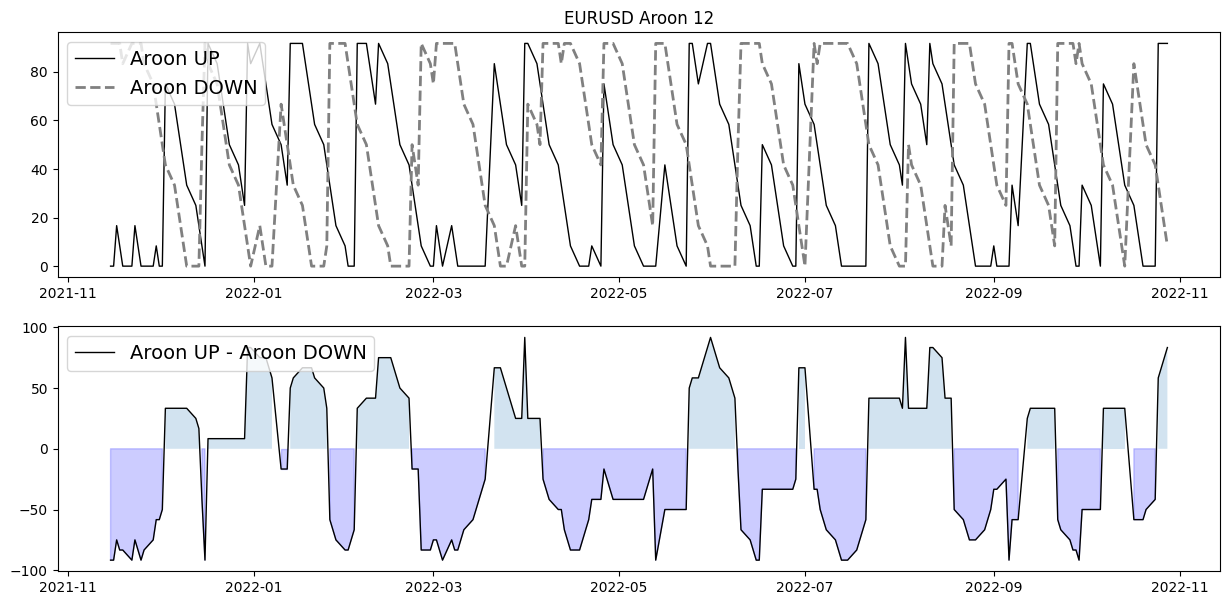

In [12]:
last_year  = data.iloc[-250:, -3:]
last_year.index = pd.to_datetime(last_year.index)

fig, ax = plt.subplots(figsize=(15,7), nrows=2)
ax[0].set_title(f"EURUSD Aroon {n}")
ax[0].plot(last_year["aroon_up"], lw=1, ls='-', color='k', label='Aroon UP')
ax[0].plot(last_year['aroon_down'], lw=2, ls='--', color='gray', label='Aroon DOWN')
ax[0].legend(loc='upper left', fontsize=14)

ax[1].plot(last_year['aroon_dif'], lw=1, ls='-', color='k', label='Aroon UP - Aroon DOWN')
ax[1].fill_between(last_year.index, last_year['aroon_dif'], 0, where=last_year['aroon_dif']>0, alpha=0.2)
ax[1].fill_between(last_year.index, last_year['aroon_dif'], 0, where=last_year['aroon_dif']<0, color='blue', alpha=0.2)
ax[1].legend(loc='upper left', fontsize=14)

In [13]:
rango_fw = range(10,20)
for i in rango_fw:
    data[f'fw_{i}'] = (data.Close.shift(-i)/data.Close-1) *100

fws = [f'fw_{i}' for i in rango_fw]


cols = ['aroon_dif'] + fws
data = data.loc[:, cols].dropna().round(4)

display (data)

for fw in fws:
    r2 = data['aroon_dif'].corr(data[fw])
    print (f"El r2 con {fw} es {r2:.4f}")


,aroon_dif,fw_10,fw_11,fw_12,fw_13,fw_14,fw_15,fw_16,fw_17,fw_18,fw_19
2003-09-16,58.3333,4.4681,4.8173,4.6830,3.6533,3.7249,5.4620,5.8381,5.0501,5.5874,4.7547
2003-09-17,58.3333,3.8963,3.7632,2.7425,2.8135,4.5354,4.9081,4.1271,4.6596,3.8342,4.0117
2003-09-18,58.3333,3.9755,2.9527,3.0238,4.7492,5.1227,4.3401,4.8737,4.0466,4.2245,3.3351
2003-09-19,91.6667,1.6330,1.7032,3.4065,3.7752,3.0026,3.5294,2.7129,2.8885,2.0105,1.7647
2003-09-22,91.6667,0.9235,2.6137,2.9796,2.2129,2.7357,1.9254,2.0997,1.2284,0.9845,1.6466
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-27,-83.3333,1.1330,1.1570,1.9085,1.3029,2.5641,2.7934,1.8501,1.9825,2.7830,2.8664
2022-09-28,-83.3333,-0.2897,0.4510,-0.1459,1.0973,1.3233,0.3935,0.5240,1.3130,1.3952,2.3918
2022-09-29,-91.6667,-0.4034,-0.9952,0.2374,0.4615,-0.4604,-0.3311,0.4513,0.5328,1.5209,2.6791
2022-09-30,-50.0000,-0.8296,0.4051,0.6296,-0.2939,-0.1643,0.6194,0.7010,1.6908,2.8509,1.6734


El r2 con fw_10 es 0.0084
El r2 con fw_11 es 0.0158
El r2 con fw_12 es 0.0213
El r2 con fw_13 es 0.0222
El r2 con fw_14 es 0.0206
El r2 con fw_15 es 0.0203
El r2 con fw_16 es 0.0181
El r2 con fw_17 es 0.0159
El r2 con fw_18 es 0.0129
El r2 con fw_19 es 0.0112


C:\Users\aguST\AppData\Local\Temp\ipykernel_23312\3770880644.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medias = data.groupby('variacion_tipo').mean().loc[:, features].round(2)
C:\Users\aguST\AppData\Local\Temp\ipykernel_23312\3770880644.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  desvios = data.groupby('variacion_tipo').std().loc[:, features].round(2)


Medias segun clasificacion de variacion
                aroon_dif
variacion_tipo           
Down                -0.29
Up                   1.16

Desvios segun clasificacion de variacion
                aroon_dif
variacion_tipo           
Down                61.38
Up                  61.59


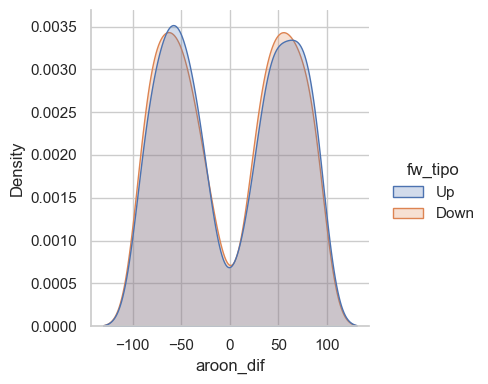

In [24]:
"""fw_13 es la de mayor correlacion, representa 13 dias hacia adelante"""
#TODO: ESTO ESTA HARCODEADO

features = ['aroon_dif']

data['variacion_tipo'] = np.where(data.fw_13 > 0, 'Up', 'Down')

medias = data.groupby('variacion_tipo').mean().loc[:, features].round(2)
desvios = data.groupby('variacion_tipo').std().loc[:, features].round(2)

print (f"Medias segun clasificacion de variacion\n{medias}\n")
print (f"Desvios segun clasificacion de variacion\n{desvios}")

data['fw_tipo'] = np.where(data.fw_13 >0, 'Up', 'Down') # DRY
sns.displot(data, x='aroon_dif', hue='fw_tipo', kind='kde', height=4, fill=True);

[(-10.0, 10.0)]

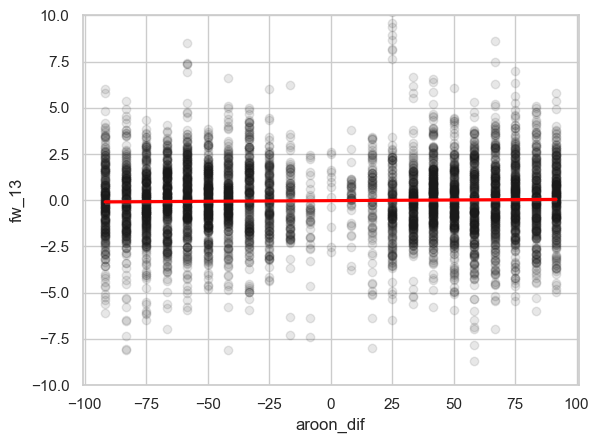

In [26]:
#TODO ESTO ESTA HARDCODEADO CON FW_13
sns.set(style='whitegrid')
g = sns.regplot(x='aroon_dif', y='fw_13', data=data, line_kws={"color":"red"}, scatter_kws={"color":"k", "alpha":.1})
g.set(ylim=(-10,10))

## INDICADORES DE FLUJO (VOLUMEN Y DERIVADOS)

-71-